In [62]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, ContinuousPeaksGenerator, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, SKMLPRunner

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [63]:
SEED = 42
OUTPUT_DIRECTORY = 'selected_results'

# FLIPFLOP

In [64]:
problem = FlipFlopGenerator.generate(seed=SEED, size=30)
experiment_name = 'Flipflop30'

In [65]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=5000,
                restart_list=[25, 75, 100])  
                
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

ERROR:root:Problem restoring SIGNINT handler


In [66]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000131,13.0,0.0,25,512,0
1,1,0.007206,13.0,1.0,25,512,0
2,1,0.007206,14.0,2.0,25,512,1
3,1,0.007206,19.0,4.0,25,512,2
4,1,0.007206,16.0,6.0,25,512,3
...,...,...,...,...,...,...,...
201,1,0.007206,14.0,122.0,100,512,96
202,1,0.007206,15.0,123.0,100,512,97
203,1,0.007206,16.0,125.0,100,512,98
204,1,0.007206,16.0,126.0,100,512,99


In [67]:
rhc_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,13.0,0,0.000131,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
1,1,13.0,1,0.007206,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",25,512,0
2,0,14.0,1,0.009175,"[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",25,512,1
3,1,14.0,2,0.010452,"[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",25,512,1
4,0,17.0,2,0.011727,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",25,512,2
...,...,...,...,...,...,...,...,...
401,1,16.0,125,0.581455,"[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",100,512,98
402,0,16.0,125,0.585347,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",100,512,99
403,1,16.0,126,0.589706,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",100,512,99
404,0,16.0,126,0.593961,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...",100,512,100


<AxesSubplot:>

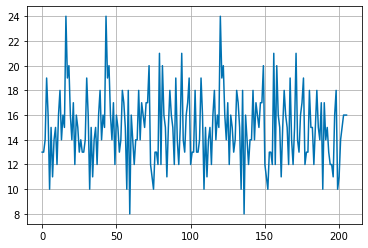

In [68]:
rhc_run_curves['Fitness'].plot()

In [69]:
sa = SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(14),
                max_attempts=5000,
                temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                decay_list=[mlrose_hiive.GeomDecay])
            
# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

ERROR:root:Problem restoring SIGNINT handler


<AxesSubplot:>

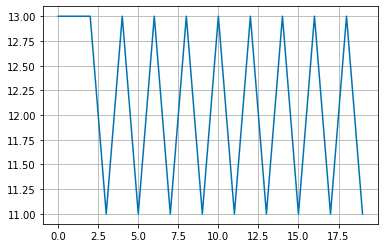

In [70]:
sa_run_curves['Fitness'].plot()

In [71]:
ga = GARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(12),
                max_attempts=1000,
                population_sizes=[150, 200, 300],
                mutation_rates=[0.4, 0.5, 0.6])
                
# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

ERROR:root:Problem restoring SIGNINT handler


<AxesSubplot:>

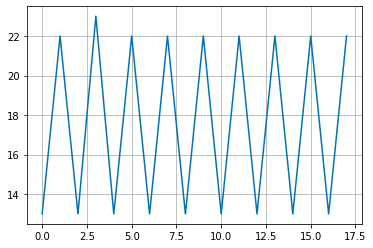

In [72]:
ga_run_curves['Fitness'].plot()

In [73]:
mmc = MIMICRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=500,
                    keep_percent_list=[0.25, 0.5, 0.75],
                    population_sizes=[150, 200, 300])          
# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

ERROR:root:Problem restoring SIGNINT handler


<AxesSubplot:>

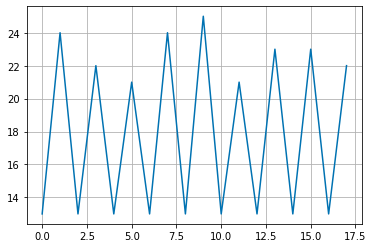

In [74]:
mmc_run_curves['Fitness'].plot()

In [75]:
mmc_run_stats

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,13.0,0,0.000727,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,150,0.25,512
1,1,24.0,2,0.137939,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",False,150,0.25,512
2,0,13.0,0,0.000155,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,150,0.50,512
3,1,22.0,2,0.121327,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,150,0.50,512
4,0,13.0,0,0.000166,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,150,0.75,512
5,1,21.0,2,0.121097,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",False,150,0.75,512
6,0,13.0,0,0.000164,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,200,0.25,512
7,1,24.0,2,0.115501,"[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",False,200,0.25,512
8,0,13.0,0,0.000147,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,200,0.50,512
9,1,25.0,2,0.119704,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,200,0.50,512
